Read the iris data from text file


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq

import matplotlib.pylab as plt
df = pd.read_csv(u'iris.txt',sep=' ')
df

,sl,sw,pl,pw,c
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


Create a hashstack from the iris data

In [25]:

X = np.hstack([
        np.matrix(df.sl).T, 
        np.matrix(df.sw).T, 
        np.matrix(df.pl).T, 
        np.matrix(df.pw).T])
c = np.matrix(df.c).T

Define a function that calculates the distance between two points

In [26]:
def Divergence(x,y,p=2.):
    e = np.array(x) - np.array(y)
    if np.isscalar(p):
        return np.sum(np.abs(e)**p)
    else:
        return np.sum(np.matrix(e)*p*np.matrix(e).T)

Define a function that implements KNN algorithm using priority queue and testing success rate with leave-one-out method.

In [95]:
def leave_one_out(A, c, k, p=2):
     
    N = A.shape[0]   
    correct = 0    
    for j in range(N):
        md = np.inf
        heap = []
        for i in range(N):
            if i != j:
                d = Divergence(A[i,:], A[j,:], p=p)
                heap.append((d, i))
        heapq.heapify(heap)
            
        classCountDictionary = {}
        for i in range(k):
            itemIndex = heapq.heappop(heap)[1]
            classOfItem = c[itemIndex].item(0)
            if classOfItem not in classCountDictionary:
                classCountDictionary[classOfItem] = 0;
            classCountDictionary[classOfItem] += 1;
            
        estimatedClass = max(classCountDictionary, key=classCountDictionary.get)
        if estimatedClass == c[j]:
            correct += 1
    
    accuracy = 1.*correct/N
    return accuracy

call leave_one_method with all possible K values in order to test with K value gives best results.

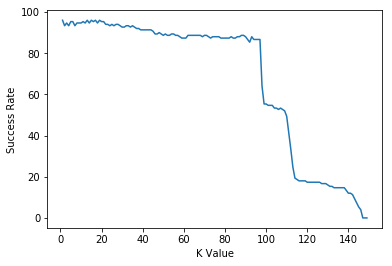

In [137]:
knnPerformanceDictionary = {}

for i in range(1,c.size):
    knnPerformanceDictionary[i] = leave_one_out(X, c, i, p=np.diag([1,2,1,0.1]))*100
    
plt.clf()
plt.xlabel("K Value")
plt.ylabel("Success Rate")
plt.plot(knnPerformanceDictionary.keys(), knnPerformanceDictionary.values())
plt.show()